### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../amz_uk_price_prediction_dataset.csv.zip")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [17]:
crosstab_result = pd.crosstab(index=df["category"], columns=df["isBestSeller"]).sort_values(by=True, ascending=False)
crosstab_result.head()

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [19]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)
chi2_pvalue

0.0

In [ ]:
"""
Sí, obtener un valor de p-value igual a 0.0 en este contexto es correcto y refleja una relación muy fuerte entre las categorías de productos
y su estado de "Best Seller". Esto indica que la hipótesis nula (de que no hay relación) es extremadamente improbable.
"""

''

In [26]:
association(crosstab_result, method='cramer')

0.12228294397605641

In [ ]:
# The Cramer value of 0.148 suggests a weak association between the two variables.

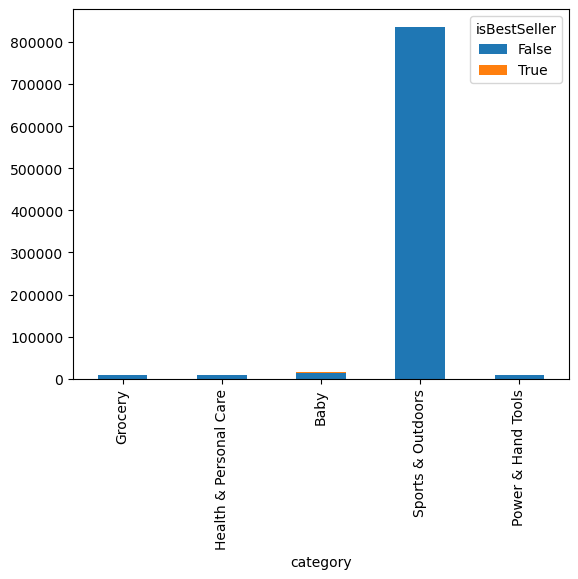

In [31]:
crosstab_result.head().plot(kind='bar', stacked=True)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [32]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [44]:
tukeys_test_outliers(df.price)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [ ]:
outliers = tukeys_test_outliers(df.price).index
outliers

Index([     10,      19,      25,      28,      31,      33,      34,      35,
            36,      37,
       ...
       2443590, 2443591, 2443603, 2443613, 2443614, 2443619, 2443627, 2443638,
       2443641, 2443643],
      dtype='int64', length=327688)

In [ ]:
df2 = df.copy()
df2.drop(index=outliers, inplace=True)
df2.head(15)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [47]:
df2.shape

(2115963, 9)

In [63]:
top_categories = df2['category'].value_counts().head(20).index
df_top_categories = df2[df2['category'].isin(top_categories)]

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_26180\2143667315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_categories, x="category", y="price", palette="coolwarm")


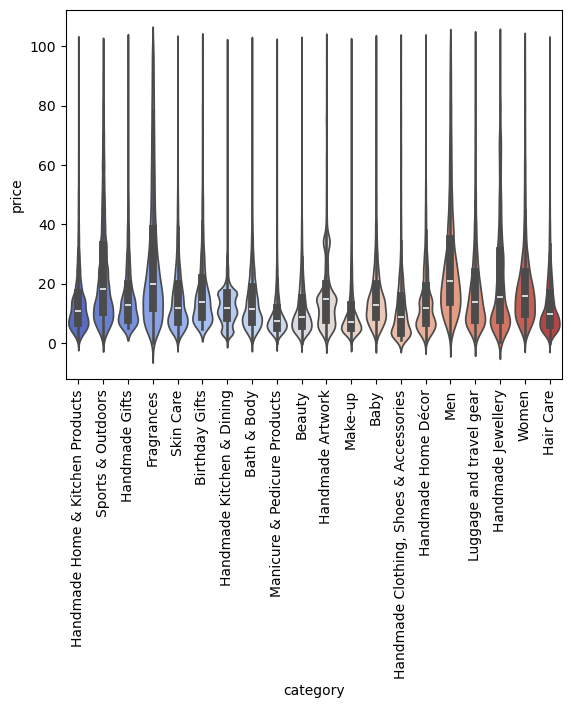

In [61]:
sns.violinplot(data=df_top_categories, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [73]:
df2.groupby(["category"])["price"].agg("median").sort_values(ascending=False).head(1)

category
Desktop PCs    74.0
Name: price, dtype: float64

In [77]:
top_10_categories = df2['category'].value_counts().head(10).index
df_top_10_categories = df2[df2['category'].isin(top_10_categories)]

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_26180\2769511456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_categories, x="category", y="price", palette="coolwarm")


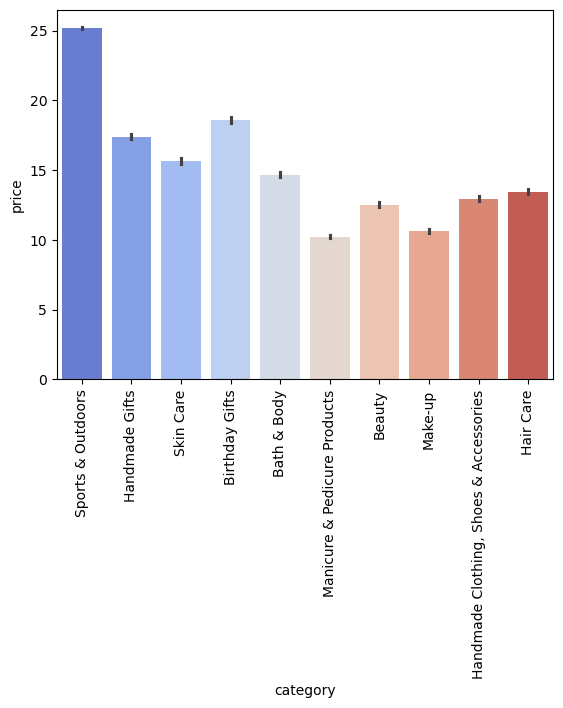

In [80]:
sns.barplot(data=df_top_10_categories, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [81]:
df2.groupby(["category"])["price"].agg("mean").sort_values(ascending=False).head(1)

category
Motherboards    68.772432
Name: price, dtype: float64

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_26180\3339318559.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_categories, x="category", y="stars", palette="coolwarm")


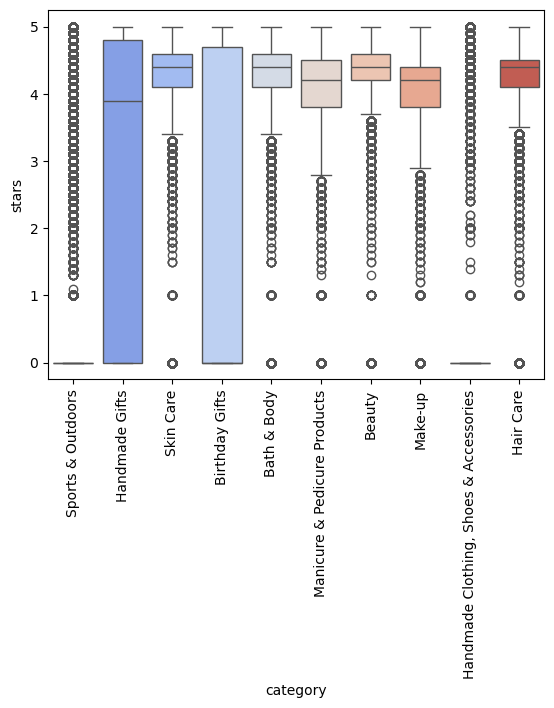

In [84]:
sns.boxplot(data=df_top_10_categories, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [85]:
df2.groupby(["category"])["stars"].agg("median").sort_values(ascending=False).head(1)

category
Computer Memory    4.7
Name: stars, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [87]:
df['price'].corr(df['stars']).round(2)

-0.12

In [88]:
#A negative value means that there is a negative correlation, but as it is close to 0 it means that there is little to no linear/monotonic correlation.

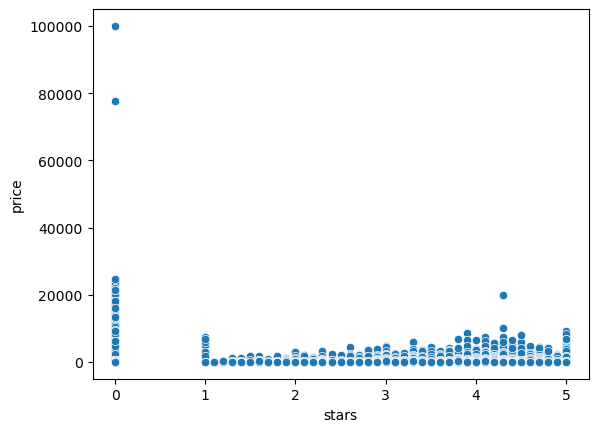

In [106]:
sns.scatterplot(data=df, x='stars', y='price')
plt.show()

In [ ]:
"""
We can observe that the most expensive products have no reviews, we can also observe that there are many 1s meaning that are not happy with their
purchase are more prone to leave a review
"""

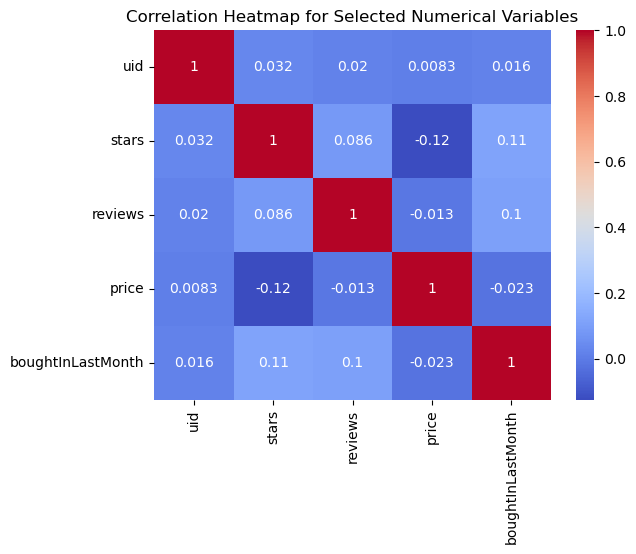

In [ ]:
correlation_matrix = df.select_dtypes(include="number").corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

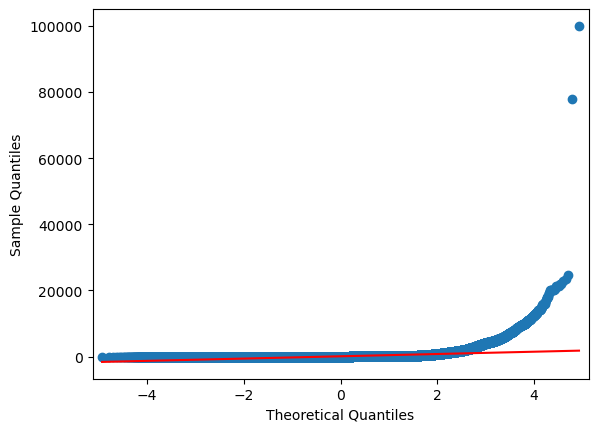

In [94]:
sm.qqplot(df['price'], line='s')
plt.show()

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?

In [107]:
top_categories_out = df['category'].value_counts().head(20).index
df_top_categories_out = df[df['category'].isin(top_categories_out)]

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_26180\3341801914.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_categories_out, x="category", y="price", palette="coolwarm")


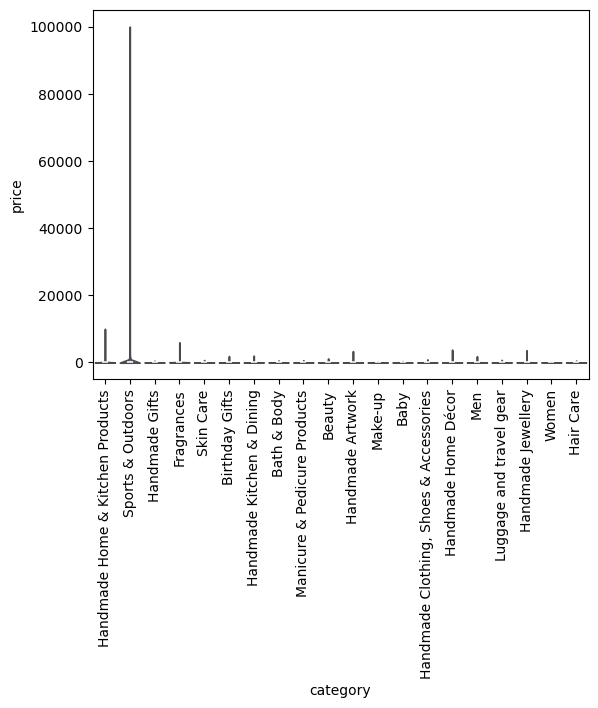

In [108]:
sns.violinplot(data=df_top_categories_out, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [109]:
df.groupby(["category"])["price"].agg("median").sort_values(ascending=False).head(1)

category
Laptops    1042.725
Name: price, dtype: float64

In [110]:
top_10_categories_out = df['category'].value_counts().head(10).index
df_top_10_categories_out = df[df['category'].isin(top_10_categories_out)]

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_26180\3810974719.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_categories_out, x="category", y="price", palette="coolwarm")


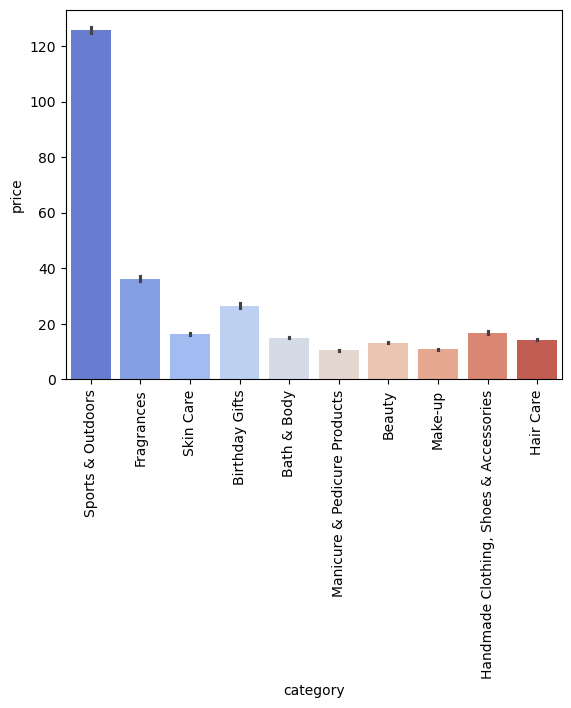

In [111]:
sns.barplot(data=df_top_10_categories_out, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [112]:
df.groupby(["category"])["price"].agg("mean").sort_values(ascending=False).head(1)

category
Laptops    1087.987827
Name: price, dtype: float64

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_26180\62710659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_categories_out, x="category", y="stars", palette="coolwarm")


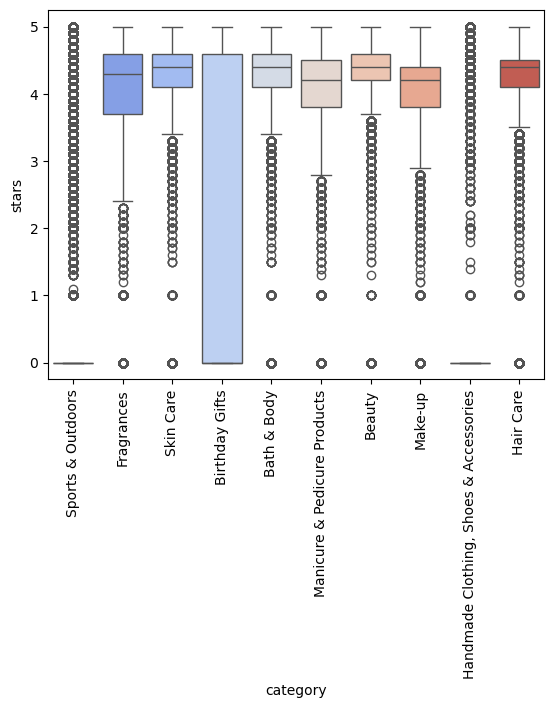

In [113]:
sns.boxplot(data=df_top_10_categories_out, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [114]:
df.groupby(["category"])["stars"].agg("median").sort_values(ascending=False).head(1)

category
Computer Memory    4.7
Name: stars, dtype: float64

In [ ]:
"""
The conclusion of this analysis are that if you do not take out the outliers the graphs can be meaningless or very difficult to apreciate,
and that the outliers can hugely impact the values
"""